# Predicting Car Prices

In this project we will learn how to predict the car price using a machine learning workflow.
 For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

In [1]:
import pandas as pd
import numpy as np
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


we had to manually enter the columns because the intial read did not to that for us .

In [2]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# we have unusual ? in normlaise losses which we will replace with nan
# to use k-nearest neighbors, all features columns have to be numerical, so we will have to perform data cleaning 

cars = cars.replace('?',np.nan)
print(cars.head())
cars['normalized-losses'] = cars['normalized-losses'].astype('float64')

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3               NaN  alfa-romero       gas        std          two   
1          3               NaN  alfa-romero       gas        std          two   
2          1               NaN  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size  \
0  convertible          rwd           front        88.6  ...          130   
1  convertible          rwd           front        88.6  ...          130   
2    hatchback          rwd           front        94.5  ...          152   
3        sedan          fwd           front        99.8  ...          109   
4        sedan          4wd           front        99.4  ...          136   

   fuel-system  bore  stroke compression-rate hors

In [5]:
numeric_cars = cars.select_dtypes(include = ['int64','float64'])
numeric_cars.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,compression-rate,city-mpg,highway-mpg
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,9.0,21,27
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,9.0,19,26
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,10.0,24,30
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,8.0,18,22


In [6]:
numeric_cars.shape

(205, 11)

In [7]:
additional_columns = ['bore','stroke','compression-rate','horsepower','peak-rpm','price']
for i in additional_columns:
    numeric_cars[i] = cars[i]
numeric_cars = numeric_cars.drop(['symboling'],axis = 1)
numeric_cars.isnull().sum()

<ipython-input-7-2c3bfb49337a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_cars[i] = cars[i]


normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
compression-rate      0
city-mpg              0
highway-mpg           0
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [8]:
numeric_cars = numeric_cars.astype('float')
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
# Confirm that there's no more missing values!
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
compression-rate     0
city-mpg             0
highway-mpg          0
bore                 0
stroke               0
horsepower           0
peak-rpm             0
price                0
dtype: int64

In [9]:
# converting values such that they range between 0 and 1, as the columns may vary hugely in the their individual
# ranges and when calculating mse, we might get improper results or preferences. Even though n-1 features may match,
#but if the last feature differ hugely in their value, the two cars may be considered drastically different. 
#Converting them still correlates each column values with their own column values with the same parameter

price_column = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_column

In [10]:
numerical_columns = numeric_cars.columns.tolist()
numerical_columns.pop()
numerical_columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-rate',
 'city-mpg',
 'highway-mpg',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

In [11]:
# before training and mse calculation we can find some relations in the data

corr = numeric_cars.corr()
sorted_corr = abs(corr['price']).sort_values()
sorted_corr

compression-rate     0.070990
stroke               0.082095
peak-rpm             0.100854
normalized-losses    0.133999
height               0.134388
bore                 0.532300
wheel-base           0.583168
city-mpg             0.667449
length               0.682986
highway-mpg          0.690526
width                0.728699
horsepower           0.757917
curb-weight          0.820825
engine-size          0.861752
price                1.000000
Name: price, dtype: float64

Looking at the correlation values, we can get an essence of the features that mighht affect the price the most. But we have to calculate the errors of actual model training and calculation before finalising anything.

## Univariate k-nearest neighbors

Here, we will be using one feature to train and test against price using Sci-Kit Learn. We will rank them based on their root mean squared error.

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
def knn_train_test(train_feature, target_col, df):
    
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    # defining train and test datasets
    mid = int(len(df)/2)
    train_df = df.iloc[:mid,:]
    test_df = df.iloc[mid:,:]
    
    knn = KNeighborsRegressor()
    knn.fit(train_df[[train_feature]],train_df[target_col])
    predictions = knn.predict(test_df[[train_feature]])
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return rmse


In [13]:
numerical_columns

['normalized-losses',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'engine-size',
 'compression-rate',
 'city-mpg',
 'highway-mpg',
 'bore',
 'stroke',
 'horsepower',
 'peak-rpm']

In [14]:
rmse_uni = {}
for i in numerical_columns:
    rmse_uni[i] = knn_train_test(i,'price',numeric_cars)

In [15]:
rmse_uni

{'normalized-losses': 8246.797180940934,
 'wheel-base': 9649.74827452917,
 'length': 8827.576764096792,
 'width': 6819.524241906653,
 'height': 10888.31474142904,
 'curb-weight': 5981.5961011543495,
 'engine-size': 4821.1058157726975,
 'compression-rate': 7931.911082144877,
 'city-mpg': 4826.908842041854,
 'highway-mpg': 4702.996454439048,
 'bore': 13323.697665030348,
 'stroke': 9192.843085497168,
 'horsepower': 4996.5931612626255,
 'peak-rpm': 9659.574802371517}

In [16]:
rmse_uni_min = min(rmse_uni,key = rmse_uni.get) 
rmse_uni_min

'highway-mpg'

So the column <b>highway-mpg</b> is the feature that has the lowest rmse for the default K = 5 value.

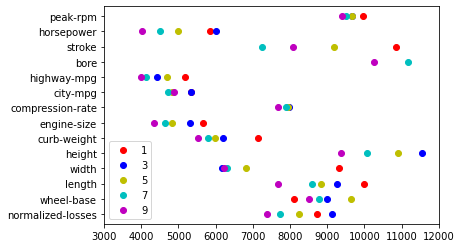

In [17]:
import matplotlib.pyplot as plt
def knn_train_test_k(train_feature, target_col, df,k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_df = df.iloc[:int(len(df)/2),:]
    test_df = df.iloc[int(len(df)/2):,:]
    knn.fit(train_df[[train_feature]],train_df[target_col])
    predictions = knn.predict(test_df[[train_feature]])
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return rmse, list(test_df[target_col]),list(predictions)
k = [1,3,5,7,9]
x = numerical_columns 
rmse_uni_k = {}
colors = ['r','b','y','c','m']

# these are the changes I am adding to analyse further
prices_uni_k = {}
predictions_uni_k = {}
for i in numerical_columns:
    d = {}
    prices = {}
    predictions = {}
    for j in k:
        z,price,predict = knn_train_test_k(i,'price',numeric_cars,j)
        d[j] = z
        prices[j] = price
        predictions[j] = predict
        plt.scatter(z,i,color = colors[int((j-1)/2)])
        plt.legend(k)
    rmse_uni_k[i] = d
    prices_uni_k[i] = prices
    predictions_uni_k[i] = predictions
plt.xlim([3000,12000])
plt.show()

Insights from the graph suggest that the lowest rmse values for k ranging from 1 to 9 with an interval of 2 is <b>highway-mpg</b> at a value of k=9. One explanation of this can be the correlation of the feature with the price, but that is just surface level.

One more thing we can do is get the values of prices and predicted prices from the function.

In [18]:
rmse_uni_k

{'normalized-losses': {1: 8730.931714690953,
  3: 9132.30052644129,
  5: 8246.797180940934,
  7: 7731.286208857365,
  9: 7382.18225802066},
 'wheel-base': {1: 8106.735021520181,
  3: 9004.470600946595,
  5: 9649.74827452917,
  7: 8782.02059619916,
  9: 8508.592019851796},
 'length': {1: 9999.119164359023,
  3: 9250.708547608927,
  5: 8827.576764096792,
  7: 8596.352373651833,
  9: 7668.679953322082},
 'width': {1: 9323.779007222787,
  3: 6172.68035697483,
  5: 6819.524241906653,
  7: 6294.841265873941,
  9: 6213.0835771632455},
 'height': {1: 14585.02008290746,
  3: 11541.107590752637,
  5: 10888.31474142904,
  7: 10069.64622778205,
  9: 9363.597059413903},
 'curb-weight': {1: 7134.817057235699,
  3: 6206.820624217271,
  5: 5981.5961011543495,
  7: 5782.7881790408455,
  9: 5533.505423344071},
 'engine-size': {1: 5651.403465742561,
  3: 5300.943874056778,
  5: 4821.1058157726975,
  7: 4647.882332451139,
  9: 4347.223520912874},
 'compression-rate': {1: 7943.535650306552,
  3: 7958.72203

In [19]:
# many predictions will be the same as this is an univariate model and rows with the same feature will have the 
# same value
predictions_uni_k

{'normalized-losses': {1: [10345.0,
   10345.0,
   16430.0,
   16430.0,
   16430.0,
   5389.0,
   5389.0,
   15250.0,
   15250.0,
   5389.0,
   5389.0,
   15250.0,
   15250.0,
   5389.0,
   5389.0,
   5389.0,
   18280.0,
   18280.0,
   9959.0,
   9959.0,
   9959.0,
   7295.0,
   15250.0,
   20970.0,
   15250.0,
   15250.0,
   15250.0,
   15250.0,
   15250.0,
   15250.0,
   10945.0,
   5195.0,
   10945.0,
   5195.0,
   10945.0,
   5195.0,
   6575.0,
   6575.0,
   6575.0,
   7349.0,
   7349.0,
   7349.0,
   7349.0,
   7349.0,
   8845.0,
   8845.0,
   8845.0,
   8845.0,
   8845.0,
   8845.0,
   7295.0,
   7295.0,
   6575.0,
   25552.0,
   25552.0,
   25552.0,
   25552.0,
   25552.0,
   25552.0,
   25552.0,
   25552.0,
   8249.0,
   8249.0,
   8249.0,
   8249.0,
   6479.0,
   6479.0,
   6479.0,
   6479.0,
   6479.0,
   6479.0,
   7295.0,
   7295.0,
   7295.0,
   7295.0,
   7295.0,
   16430.0,
   16430.0,
   25552.0,
   15250.0,
   15250.0,
   15250.0,
   25552.0,
   25552.0,
   25552.0,
  

In [20]:
# these values dont depend on the model training unlike the predictions
# these values are used to calucalte the rmse values
prices_uni_k

{'normalized-losses': {1: [14399.0,
   13499.0,
   17199.0,
   19699.0,
   18399.0,
   11900.0,
   13200.0,
   12440.0,
   13860.0,
   15580.0,
   16900.0,
   16695.0,
   17075.0,
   16630.0,
   17950.0,
   18150.0,
   5572.0,
   7957.0,
   6229.0,
   6692.0,
   7609.0,
   8921.0,
   12764.0,
   22018.0,
   32528.0,
   34028.0,
   37028.0,
   13207.129353233831,
   9295.0,
   9895.0,
   11850.0,
   12170.0,
   15040.0,
   15510.0,
   18150.0,
   18620.0,
   5118.0,
   7053.0,
   7603.0,
   7126.0,
   7775.0,
   9960.0,
   9233.0,
   11259.0,
   7463.0,
   10198.0,
   8013.0,
   11694.0,
   5348.0,
   6338.0,
   6488.0,
   6918.0,
   7898.0,
   8778.0,
   6938.0,
   7198.0,
   7898.0,
   7788.0,
   7738.0,
   8358.0,
   9258.0,
   8058.0,
   8238.0,
   9298.0,
   9538.0,
   8449.0,
   9639.0,
   9989.0,
   11199.0,
   11549.0,
   17669.0,
   8948.0,
   10698.0,
   9988.0,
   10898.0,
   11248.0,
   16558.0,
   15998.0,
   15690.0,
   15750.0,
   7775.0,
   7975.0,
   7995.0,
   8195.0,


In [21]:
# calculating mean rmse values for each column rmse of 5 k values
#sorting the values which tells us the order of feature selection
import statistics
mean_rmse = {}
for i,j in rmse_uni_k.items():
    mean_rmse[i] = statistics.mean(j.values())
rmse_sorted =  sorted(mean_rmse.items(), key=lambda item: item[1])
rmse_sorted

[('highway-mpg', 4489.6735739622945),
 ('engine-size', 4953.71180178721),
 ('city-mpg', 5019.88971498235),
 ('horsepower', 5078.322922405168),
 ('curb-weight', 6127.905476998447),
 ('width', 6964.781689828291),
 ('compression-rate', 7882.231160286434),
 ('normalized-losses', 8244.69957779024),
 ('wheel-base', 8810.31330260938),
 ('length', 8868.48736060773),
 ('stroke', 9496.1368990029),
 ('peak-rpm', 9633.810412913024),
 ('height', 11289.537140457018),
 ('bore', 12387.050771660728)]

In [22]:
sorted_index = []
sorted_values = []
for i in rmse_sorted:
    sorted_index.append(i[0])
    sorted_values.append(i[1])
rmse_sorted = pd.Series(sorted_values, index = sorted_index)
rmse_sorted

highway-mpg           4489.673574
engine-size           4953.711802
city-mpg              5019.889715
horsepower            5078.322922
curb-weight           6127.905477
width                 6964.781690
compression-rate      7882.231160
normalized-losses     8244.699578
wheel-base            8810.313303
length                8868.487361
stroke                9496.136899
peak-rpm              9633.810413
height               11289.537140
bore                 12387.050772
dtype: float64

## Multivariate KNN

For multivariate Regression we will do the following
- Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.
- Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.


In [34]:
def knn_train_test(train_feature, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(4)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_df = df.iloc[:int(len(df)/2),:]
    test_df = df.iloc[int(len(df)/2):,:]
    knn.fit(train_df[train_feature],train_df[target_col])
    predictions = knn.predict(test_df[train_feature])
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_multi = {}

for i in range(2,6):
    rmse_multi[i] = knn_train_test(sorted_index[:i],'price',numeric_cars)

In [35]:
rmse_multi

{2: 4670.18786324807,
 3: 4346.318321065622,
 4: 3973.7999954994466,
 5: 4189.144032530089}

In [38]:
# the top 3 models are containing 3,4 and 5 features
def knn_train_test_k(train_feature, target_col, df,k):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    train_df = df.iloc[:int(len(df)/2),:]
    test_df = df.iloc[int(len(df)/2):,:]
    knn.fit(train_df[train_feature],train_df[target_col])
    predictions = knn.predict(test_df[train_feature])
    mse = mean_squared_error(test_df[target_col],predictions)
    rmse = np.sqrt(mse)
    return rmse

rmse_multi_k = {}
k = [i for i in range(1,26)]
for i in range(2,6):
    d = {}
    for j in k:
        d[j] = knn_train_test_k(sorted_index[:i],'price',numeric_cars,j)
        plt.scatter
    rmse_multi_k[i] = d

In [39]:
rmse_multi_k

{2: {1: 4609.470216141888,
  2: 4659.988774369158,
  3: 4612.02173801327,
  4: 4514.613104125041,
  5: 4670.18786324807,
  6: 4140.443291763167,
  7: 3866.6778867562525,
  8: 3829.7926622019704,
  9: 3727.430383708687,
  10: 3579.7436117270945,
  11: 3449.605284544298,
  12: 3399.495726261016,
  13: 3442.323031807465,
  14: 3494.8497015070575,
  15: 3561.603619813081,
  16: 3616.919197355503,
  17: 3601.475661543099,
  18: 3643.5010924580074,
  19: 3627.373272301764,
  20: 3666.7241758578593,
  21: 3696.8367350316666,
  22: 3687.1610781540426,
  23: 3605.0020996127855,
  24: 3530.534331757233,
  25: 3564.776014001351},
 3: {1: 5637.582774530638,
  2: 4738.67230650477,
  3: 4390.540061873881,
  4: 4369.026761793873,
  5: 4346.318321065622,
  6: 4127.839832020747,
  7: 3866.0455675004964,
  8: 3729.2590969669923,
  9: 3635.0847079461973,
  10: 3652.311361608205,
  11: 3686.61979799408,
  12: 3673.8166469181947,
  13: 3673.9390184349927,
  14: 3723.1540059661156,
  15: 3731.098703972646,


In [40]:
rmse_multi_k.items()

dict_items([(2, {1: 4609.470216141888, 2: 4659.988774369158, 3: 4612.02173801327, 4: 4514.613104125041, 5: 4670.18786324807, 6: 4140.443291763167, 7: 3866.6778867562525, 8: 3829.7926622019704, 9: 3727.430383708687, 10: 3579.7436117270945, 11: 3449.605284544298, 12: 3399.495726261016, 13: 3442.323031807465, 14: 3494.8497015070575, 15: 3561.603619813081, 16: 3616.919197355503, 17: 3601.475661543099, 18: 3643.5010924580074, 19: 3627.373272301764, 20: 3666.7241758578593, 21: 3696.8367350316666, 22: 3687.1610781540426, 23: 3605.0020996127855, 24: 3530.534331757233, 25: 3564.776014001351}), (3, {1: 5637.582774530638, 2: 4738.67230650477, 3: 4390.540061873881, 4: 4369.026761793873, 5: 4346.318321065622, 6: 4127.839832020747, 7: 3866.0455675004964, 8: 3729.2590969669923, 9: 3635.0847079461973, 10: 3652.311361608205, 11: 3686.61979799408, 12: 3673.8166469181947, 13: 3673.9390184349927, 14: 3723.1540059661156, 15: 3731.098703972646, 16: 3752.170513883767, 17: 3700.668867566034, 18: 3683.27256723

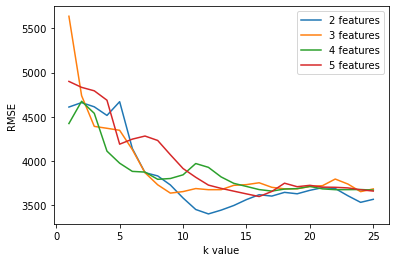

In [41]:
import matplotlib.pyplot as plt
for i,j in rmse_multi_k.items():
    x = list(j.keys())
    y = list(j.values())
    plt.plot(x,y,label = f'{i} features')
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [45]:
for i,j in rmse_multi_k.items():
    m = min(j,key = j.get)
    print(f'For {i} best features, the k for min value is {m}')

For 2 best features, the k for min value is 12
For 3 best features, the k for min value is 9
For 4 best features, the k for min value is 17
For 5 best features, the k for min value is 16
